In [4]:
import full_model
import fast_model
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from joblib import Parallel, delayed

In [5]:
def generate_and_find_inf(num_nodes, steps, num_influencers=0):

    G = nx.barabasi_albert_graph(num_nodes, 2)

    model_inf = fast_model.InfluenceDeinfluenceModel(G)
    model_inf.set_initial_states()
    initial_influencers = model_inf.greedy_hill_climbing(num_influencers, steps)

    #initial_influencers = model_inf.greedy_hill_climbing_new(num_influencers)
    print("Optimized Initial Influencers:", initial_influencers)

    return model_inf, initial_influencers

In [6]:
# Example usage
num_nodes = 500
inf_steps = 10
num_influencers = 10

results = generate_and_find_inf(num_nodes, inf_steps, num_influencers=num_influencers)

(model_inf, optimized_influencers) = results

#print("count influence", model.evaluate_influence())

Optimized Initial Influencers: {0, 258, 3, 10, 395, 426, 271, 474, 59, 252}


In [104]:
deinf_steps = 3
deinf_num = 3

model = full_model.InfluenceDeinfluenceModel(model_inf.graph)
model.history = []
model.selected_influencers = optimized_influencers
print("Optimized Influencers:", optimized_influencers)

model.set_initial_states()
deinfluencers = model.greedy_hill_climbing_deinf(deinf_num, 20)
print("Optimized Deinfluencers:", deinfluencers)
model.reset_graph()
model.set_influencers(optimized_influencers)
model.set_deinfluencers(deinfluencers)
model.run_cascade(deinf_steps)
#model.display_graphs_grid()

# print("count deinfuence",model.count_deinfluenced())

Optimized Influencers: {0, 1, 2, 3, 4}
Optimized Deinfluencers: {16, 17, 2}


Degree Centrality Ranking: [3, 5, 0]
Closeness Centrality Ranking: [3, 0, 5]
Betweenness Centrality Ranking: [3, 5, 0]
Eigenvector Centrality Ranking: [3, 0, 5]
PageRank Centrality Ranking: [3, 5, 6]
Random Deinfluencers: [70, 37, 18]
Optimized Deinfluencers: {0, 3, 54}
Deinfluencers from Influencers: [2, 4, 3]
Ranked Deinfluencers from Influencers: [3, 0, 2]


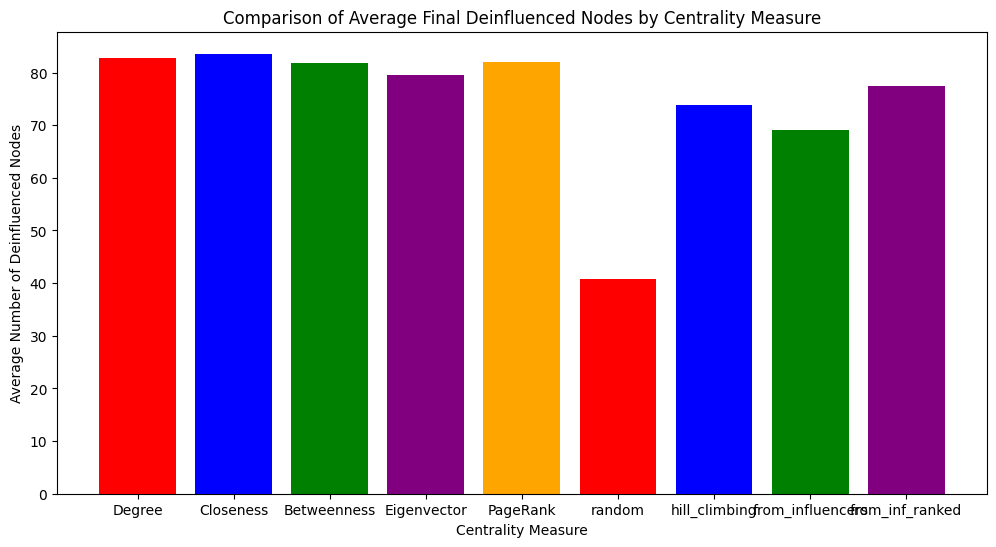

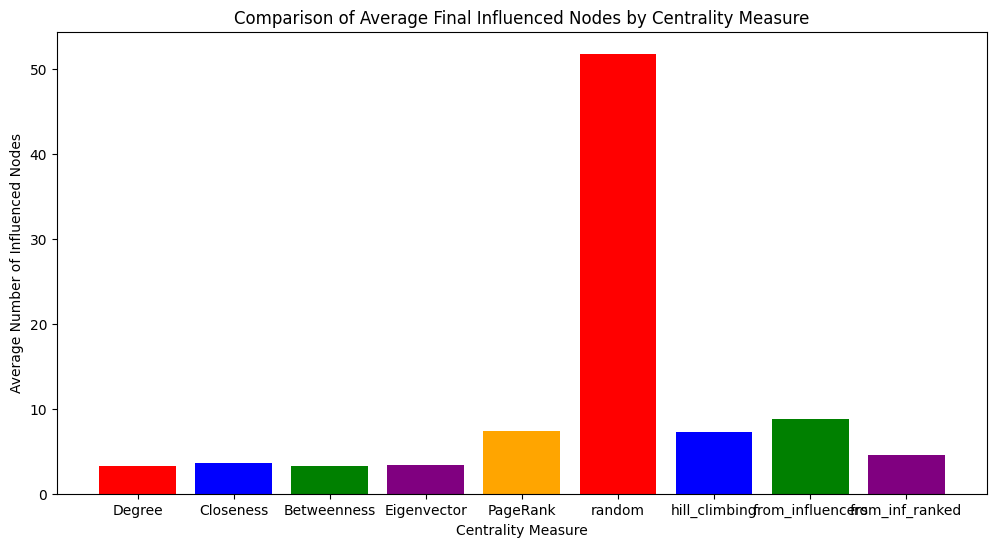

In [105]:
# Function to run the cascade and count deinfluenced nodes
def count_deinfluenced(model, inf, deinf, num_runs, steps):
    total_deinfluenced = 0
    for run in range(num_runs):
        model.reset_graph()
        model.set_influencers(inf)
        model.set_deinfluencers(deinf)
        model.run_cascade(steps)
        #print(model.history)
        deinfluenced_count = model.count_deinfluenced()
        #print(deinfluenced_count)
        #print(f"Run {run+1}/{num_runs}: {deinfluenced_count} nodes deinfluenced")
        total_deinfluenced += deinfluenced_count
        #print(f"Total deinfluenced nodes: {total_deinfluenced}")
        model.reset_graph()
        
    average_deinfluenced = total_deinfluenced / num_runs
    #print(f"Average deinfluenced nodes: {average_deinfluenced}")

    return average_deinfluenced

def count_influenced(model, inf, deinf, num_runs, steps):
    total_influenced = 0
    for run in range(num_runs):
        model.reset_graph()
        model.set_influencers(inf)
        model.set_deinfluencers(deinf)
        model.run_cascade(steps)
        #print(model.history)
        influenced_count = model.evaluate_influence()
        #print(deinfluenced_count)
        #print(f"Run {run+1}/{num_runs}: {deinfluenced_count} nodes deinfluenced")
        total_influenced += influenced_count
        #print(f"Total deinfluenced nodes: {total_deinfluenced}")
        model.reset_graph()
        
    average_influenced = total_influenced / num_runs
    #print(f"Average deinfluenced nodes: {average_deinfluenced}")

    return average_influenced


# Function to run the cascade and count deinfluenced nodes
def count_transistion(model, inf, deinf, num_runs, steps):
    model = full_model.InfluenceDeinfluenceModel(model.graph)
    ist = 0
    dst = 0
    dit = 0

    for run in range(num_runs):
        model.transition_counts = {'I->S': 0, 'D->S': 0, 'D->I': 0}
        model.reset_graph()
        model.set_influencers(inf)
        model.set_deinfluencers(deinf)
        model.run_cascade(steps)
        transistions = model.transition_counts

        #print(model.history)
        ist += transistions['I->S']
        dst += transistions['D->S']
        dit += transistions['D->I']

        print(transistions['I->S'], transistions['D->S'], transistions['D->I'])

        transitions_array_cum = np.array([ist, dst, dit])
        print(transitions_array_cum)

        model.reset_graph()
        model.transition_counts = {'I->S': 0, 'D->S': 0, 'D->I': 0}
        
    averaged_transistions = transitions_array_cum / num_runs
    #print(f"Average deinfluenced nodes: {average_deinfluenced}")

    return averaged_transistions


# Initialize the model
model.reset_graph()

# Rank nodes using different centrality measures
k_deinfluencers = 3

degree_centrality_ranking = model.select_deinfluencers_degree_centrality(k_deinfluencers)
closeness_centrality_ranking = model.select_deinfluencers_closeness_centrality(k_deinfluencers)
betweenness_centrality_ranking = model.select_deinfluencers_betweenness_centrality(k_deinfluencers)
eigenvector_centrality_ranking = model.select_deinfluencers_eigenvector_centrality(k_deinfluencers, max_iter=1000, tol=1e-06)
pagerank_centrality_ranking = model.select_deinfluencers_pagerank_centrality(k_deinfluencers)
random_deinfluencers = model.select_deinfluencers_random(k_deinfluencers)
optimized_deinfluencers = model.greedy_hill_climbing_deinf(k_deinfluencers, 5, 10)
deinfleucers_from_influencers = model.select_deinfluencers_from_influencers(j=k_deinfluencers)
ranked_deinfleucers_from_influencers = model.select_deinfluencers_from_influencers_degree_centrality(k_deinfluencers)


print("Degree Centrality Ranking:", degree_centrality_ranking)
print("Closeness Centrality Ranking:", closeness_centrality_ranking)
print("Betweenness Centrality Ranking:", betweenness_centrality_ranking)
print("Eigenvector Centrality Ranking:", eigenvector_centrality_ranking)
print("PageRank Centrality Ranking:", pagerank_centrality_ranking)
print("Random Deinfluencers:", random_deinfluencers)
print("Optimized Deinfluencers:", optimized_deinfluencers)
print("Deinfluencers from Influencers:", deinfleucers_from_influencers)
print("Ranked Deinfluencers from Influencers:", ranked_deinfleucers_from_influencers)


# Run cascades and count deinfluenced nodes for each centrality measure
num_runs = 5  # Number of times to run the cascade for averaging
steps = 3  # Number of steps to run the cascade

results_d = {
    'Degree': count_deinfluenced(model, optimized_influencers, degree_centrality_ranking, num_runs, steps),
    'Closeness': count_deinfluenced(model, optimized_influencers, closeness_centrality_ranking, num_runs, steps),
    'Betweenness': count_deinfluenced(model, optimized_influencers, betweenness_centrality_ranking, num_runs, steps),
    'Eigenvector': count_deinfluenced(model, optimized_influencers, eigenvector_centrality_ranking, num_runs, steps),
    'PageRank': count_deinfluenced(model, optimized_influencers, pagerank_centrality_ranking, num_runs, steps),
    'random': count_deinfluenced(model, optimized_influencers, random_deinfluencers, num_runs, steps),
    'hill_climbing': count_deinfluenced(model, optimized_influencers, optimized_deinfluencers, num_runs, steps),
    'from_influencers': count_deinfluenced(model, optimized_influencers, deinfleucers_from_influencers, num_runs, steps),
    'from_inf_ranked': count_deinfluenced(model, optimized_influencers, ranked_deinfleucers_from_influencers, num_runs, steps)
}

results_i = { 
    'Degree': count_influenced(model, optimized_influencers, degree_centrality_ranking, num_runs, steps),
    'Closeness': count_influenced(model, optimized_influencers, closeness_centrality_ranking, num_runs, steps),
    'Betweenness': count_influenced(model, optimized_influencers, betweenness_centrality_ranking, num_runs, steps),
    'Eigenvector': count_influenced(model, optimized_influencers, eigenvector_centrality_ranking, num_runs, steps),
    'PageRank': count_influenced(model, optimized_influencers, pagerank_centrality_ranking, num_runs, steps),
    'random': count_influenced(model, optimized_influencers, random_deinfluencers, num_runs, steps),
    'hill_climbing': count_influenced(model, optimized_influencers, optimized_deinfluencers, num_runs, steps),
    'from_influencers': count_influenced(model, optimized_influencers, deinfleucers_from_influencers, num_runs, steps),
    'from_inf_ranked': count_influenced(model, optimized_influencers, ranked_deinfleucers_from_influencers, num_runs, steps)
}


# Print the results
#for centrality, count in results.items():
    #print(f"{centrality}: {count:.2f} nodes deinfluenced on average")

# Plot the results
plt.figure(figsize=(12, 6))  # Increase the figure size
plt.bar(results_d.keys(), results_d.values(), color=['red', 'blue', 'green', 'purple', 'orange'])
plt.xlabel('Centrality Measure')
plt.ylabel('Average Number of Deinfluenced Nodes')
plt.title('Comparison of Average Final Deinfluenced Nodes by Centrality Measure')
plt.show()

plt.figure(figsize=(12, 6))  # Increase the figure size
plt.bar(results_i.keys(), results_i.values(), color=['red', 'blue', 'green', 'purple', 'orange'])
plt.xlabel('Centrality Measure')
plt.ylabel('Average Number of Influenced Nodes')
plt.title('Comparison of Average Final Influenced Nodes by Centrality Measure')
plt.show()


In [106]:
G = nx.barabasi_albert_graph(100, 2).to_directed()

model = fast_model.InfluenceDeinfluenceModel(G,"fixed")

optimized_influencers = model.greedy_hill_climbing(5, 10)  # Find the optimized influencers
optimized_deinfluencers = model.greedy_hill_climbing(2, 10)  # Find the optimized deinfluencers

In [108]:

# Initialize an empty dictionary to store the aggregated results
aggregated_results = []

model = full_model.InfluenceDeinfluenceModel(model.graph, edeg_weights_type='fixed')
#model = fast_model.InfluenceDeinfluenceModel(G,"fixed")

# Run the simulation k times
for i in range(5):
    # Reset the graph and set the influencers
    model.reset_graph()
    model.set_influencers(optimized_influencers)
    model.transition_counts = {'I->S': 0, 'D->S': 0, 'D->I': 0}
    
    # Run the cascade and count deinfluenced nodes
    result = count_transistion(model, optimized_influencers, optimized_deinfluencers, num_runs, 5)
    print(model.transition_counts)
    # Store the result in the aggregated_results dictionary
    aggregated_results.append(result)

print("Aggregated Results:", aggregated_results)

# Plot the aggregated results

# plt.figure(figsize=(10, 6))  # Increase the figure size
# for i, result in enumerate(aggregated_results):
#     plt.bar(i, result, color='blue', alpha=0.5)
# plt.xlabel('Simulation')
# plt.ylabel('Average Number of Deinfluenced Nodes')
# plt.title('Aggregated Results of Multiple Simulations')
# plt.show()

44 67 38
[44 67 38]
51 67 35
[ 95 134  73]
47 58 40
[142 192 113]
54 49 45
[196 241 158]
52 58 36
[248 299 194]
{'I->S': 0, 'D->S': 0, 'D->I': 0}
42 59 24
[42 59 24]
44 66 32
[ 86 125  56]
38 65 27
[124 190  83]
49 60 34
[173 250 117]
47 68 29
[220 318 146]
{'I->S': 0, 'D->S': 0, 'D->I': 0}
47 72 28
[47 72 28]
29 79 24
[ 76 151  52]
45 65 33
[121 216  85]
26 85 20
[147 301 105]
43 76 31
[190 377 136]
{'I->S': 0, 'D->S': 0, 'D->I': 0}
45 59 29
[45 59 29]
41 66 29
[ 86 125  58]
58 49 31
[144 174  89]
48 53 27
[192 227 116]
45 61 27
[237 288 143]
{'I->S': 0, 'D->S': 0, 'D->I': 0}
35 73 21
[35 73 21]
41 68 34
[ 76 141  55]
49 59 41
[125 200  96]
48 61 29
[173 261 125]
42 63 27
[215 324 152]
{'I->S': 0, 'D->S': 0, 'D->I': 0}
Aggregated Results: [array([49.6, 59.8, 38.8]), array([44. , 63.6, 29.2]), array([38. , 75.4, 27.2]), array([47.4, 57.6, 28.6]), array([43. , 64.8, 30.4])]


In [110]:
G = nx.barabasi_albert_graph(500, 2).to_directed()

# Initialize the InfluenceDeinfluenceModel
model = fast_model.InfluenceDeinfluenceModel(G,"fixed")

# number of influencers
k = 5

# number of steps
steps = 3
influencers = model.greedy_hill_climbing(k, steps)

model.reset_graph()
#model.set_initial_states()

print("Influencers:", influencers)

Influencers: {0, 1, 2, 291, 3}
